In [81]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import math

pd.set_option('max.columns', None)

# Import Data

## Import results file

In [2]:
results = pd.read_csv('results.csv', index_col = 0)

results = results[['row', 'plc', 'horseno', 'horse', 'jockey', 'trainer', 'actualwt',
       'declarwt', 'draw', 'lbw', 'runningpos', 'finishtime', 'winodds',
       'date', 'raceno', 'class', 'distance', 'going', 'handicap', 'course',
       'stake', 'venue']]

results.head()

,row,plc,horseno,horse,jockey,trainer,actualwt,declarwt,draw,lbw,runningpos,finishtime,winodds,date,raceno,class,distance,going,handicap,course,stake,venue
0,0,1,10.0,NATURAL EIGHT(S243),C Y Ho,C Fownes,119.0,1037.0,1.0,-,4 3 1,1.10.19,3.5,2015-06-03,1,5,1200,GOOD TO FIRM,MOUNT BUTLER HANDICAP,TURF - A COURSE,575000,Happy Valley
1,0,1,7.0,SOLAR HEI HEI(T242),B Prebble,D J Hall,125.0,1077.0,11.0,-,9 8 1,1.09.06,2.3,2015-06-07,1,4,1200,GOOD TO FIRM,HKU FOUNDATION HANDICAP,TURF - A+3 COURSE,760000,Sha Tin
2,0,1,3.0,GRAN BOLIVAR(S165),H N Wong,Y S Tsui,121.0,950.0,9.0,-,1 1 1,1.09.64,32.0,2015-06-10,1,4,1200,GOOD TO FIRM,LAI ON HANDICAP,TURF - B COURSE,760000,Happy Valley
3,0,1,11.0,PEOPLE'S KNIGHT(T305),G Mosse,J Moore,120.0,1149.0,4.0,-,4 4 1,1.09.70,6.6,2015-06-14,1,1,1200,GOOD TO FIRM,BREGUET PLATE,TURF - B+2 COURSE,800000,Sha Tin
4,0,1,2.0,SIR JOHN(P344),B Prebble,W Y So,131.0,1158.0,10.0,-,1 1 1,0.56.90,6.8,2015-06-17,1,5,1000,GOOD TO FIRM,WANG TAK HANDICAP,TURF - C COURSE,575000,Happy Valley


# Processing Plc

In [4]:
# results['plc'] = results['plc'].apply(int)
results['plc'].unique()
# results.describe()

array(['1', '1 DH', '2', '2 DH', '3', '3 DH', '4', '4 DH', '5', '5 DH',
       '6', '6 DH', '7', 'WV', '7 DH', '8', '8 DH', '9', 'PU', '9 DH',
       '10', 'UR', 'WV-A', '11', 'FE', 'DNF', '12', 'WX', 'TNP', '13',
       nan, 'WX-A', '14'], dtype=object)

In [75]:
results['plc']=results.apply(lambda x: re.sub(r'\D+','', str(x.plc)), axis=1)
results = results[results['plc']!='']
results

,row,plc,horseno,horse,jockey,trainer,actualwt,declarwt,draw,lbw,runningpos,finishtime,winodds,date,raceno,class,distance,going,handicap,course,stake,venue,horse_code
0,0,1,10.0,NATURAL EIGHT(S243),C Y Ho,C Fownes,119.0,1037.0,1.0,-,4 3 1,1.10.19,3.5,2015-06-03,1,5,1200,GOOD TO FIRM,MOUNT BUTLER HANDICAP,TURF - A COURSE,575000,Happy Valley,S243
1,0,1,7.0,SOLAR HEI HEI(T242),B Prebble,D J Hall,125.0,1077.0,11.0,-,9 8 1,1.09.06,2.3,2015-06-07,1,4,1200,GOOD TO FIRM,HKU FOUNDATION HANDICAP,TURF - A+3 COURSE,760000,Sha Tin,T242
2,0,1,3.0,GRAN BOLIVAR(S165),H N Wong,Y S Tsui,121.0,950.0,9.0,-,1 1 1,1.09.64,32.0,2015-06-10,1,4,1200,GOOD TO FIRM,LAI ON HANDICAP,TURF - B COURSE,760000,Happy Valley,S165
3,0,1,11.0,PEOPLE'S KNIGHT(T305),G Mosse,J Moore,120.0,1149.0,4.0,-,4 4 1,1.09.70,6.6,2015-06-14,1,1,1200,GOOD TO FIRM,BREGUET PLATE,TURF - B+2 COURSE,800000,Sha Tin,T305
4,0,1,2.0,SIR JOHN(P344),B Prebble,W Y So,131.0,1158.0,10.0,-,1 1 1,0.56.90,6.8,2015-06-17,1,5,1000,GOOD TO FIRM,WANG TAK HANDICAP,TURF - C COURSE,575000,Happy Valley,P344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14114,13,14,11.0,DISCIPLES TWELVE(P018),K Teetan,C Fownes,119.0,1107.0,1.0,10-1/4,10 11 14,1.10.21,66.0,2016-10-01,11,2,1200,GOOD,BEIJING HANDICAP,TURF - A+3 COURSE,1750000,Sha Tin,P018
14115,13,14,10.0,SPEEDY LONGWAH(S242),T H So,C S Shum,124.0,1124.0,13.0,50,14 14 14 14,1.30.08,99.0,2016-11-27,11,2,1400,GOOD,CHEVALIER SENIOR HOUSING HANDICAP,TURF - C COURSE,1750000,Sha Tin,S242
14116,13,14,12.0,MARVEL TRIBE(S142),K C Ng,K W Lui,110.0,1118.0,2.0,14-1/4,3 7 14,1.11.22,99.0,2017-01-01,11,2,1200,GOOD TO FIRM,TAI MO SHAN HANDICAP,TURF - B+2 COURSE,1750000,Sha Tin,S142
14117,13,14,13.0,LET US WIN(V381),K K Chiong,J Moore,108.0,1111.0,3.0,17,4 1 1 4 14,1.49.18,70.0,2017-03-05,11,2,1800,GOOD TO FIRM,TAIPA HANDICAP,TURF - C COURSE,1750000,Sha Tin,V381


# Convert data into Date, Venue, Course, and Race No. level

In [76]:
text = 'NATURAL EIGHT(S243)'

pattern = re.compile(r'([\w\W]+)?([\(])([A-Z0-9]+)([\)])')

def extract_horse_code(pattern, text):
#     print(text)
    match = re.match(pattern, text)
    return match.group(3)

In [77]:
results['horse_code'] = results['horse'].apply(lambda x: extract_horse_code(pattern, x))
results.head()

,row,plc,horseno,horse,jockey,trainer,actualwt,declarwt,draw,lbw,runningpos,finishtime,winodds,date,raceno,class,distance,going,handicap,course,stake,venue,horse_code
0,0,1,10.0,NATURAL EIGHT(S243),C Y Ho,C Fownes,119.0,1037.0,1.0,-,4 3 1,1.10.19,3.5,2015-06-03,1,5,1200,GOOD TO FIRM,MOUNT BUTLER HANDICAP,TURF - A COURSE,575000,Happy Valley,S243
1,0,1,7.0,SOLAR HEI HEI(T242),B Prebble,D J Hall,125.0,1077.0,11.0,-,9 8 1,1.09.06,2.3,2015-06-07,1,4,1200,GOOD TO FIRM,HKU FOUNDATION HANDICAP,TURF - A+3 COURSE,760000,Sha Tin,T242
2,0,1,3.0,GRAN BOLIVAR(S165),H N Wong,Y S Tsui,121.0,950.0,9.0,-,1 1 1,1.09.64,32.0,2015-06-10,1,4,1200,GOOD TO FIRM,LAI ON HANDICAP,TURF - B COURSE,760000,Happy Valley,S165
3,0,1,11.0,PEOPLE'S KNIGHT(T305),G Mosse,J Moore,120.0,1149.0,4.0,-,4 4 1,1.09.70,6.6,2015-06-14,1,1,1200,GOOD TO FIRM,BREGUET PLATE,TURF - B+2 COURSE,800000,Sha Tin,T305
4,0,1,2.0,SIR JOHN(P344),B Prebble,W Y So,131.0,1158.0,10.0,-,1 1 1,0.56.90,6.8,2015-06-17,1,5,1000,GOOD TO FIRM,WANG TAK HANDICAP,TURF - C COURSE,575000,Happy Valley,P344


In [5]:
#results[results['raceno'] == 1].groupby(['course','raceno']).size()

# results[(results['raceno'] == 1) & (results['date'] == '2015-06-03')].groupby(['venue','course']).size()

results.groupby(['date','venue','course','raceno']).size()


results[(results['course'] == 'TURF - A COURSE') & (results['date'] == '2015-06-03') & (results['raceno'] == 2)]

,row,plc,horseno,horse,jockey,trainer,actualwt,declarwt,draw,lbw,runningpos,finishtime,winodds,date,raceno,class,distance,going,handicap,course,stake,venue,horse_code
118,0,1,5.0,ROBUST MOMENTUM(P422),C Y Ho,C Fownes,122.0,1209.0,1.0,-,2 3 2 1,1.40.18,2.5,2015-06-03,2,4,1650,GOOD TO FIRM,MOUNT CAMERON HANDICAP,TURF - A COURSE,760000,Happy Valley,P422
1232,1,2,1.0,AXIOM(P095),A Suborics,A Schutz,129.0,1088.0,12.0,1,10 10 9 2,1.40.34,82.0,2015-06-03,2,4,1650,GOOD TO FIRM,MOUNT CAMERON HANDICAP,TURF - A COURSE,760000,Happy Valley,P095
2346,2,3,11.0,LIGHTNING AND GOLD(P354),W M Lai,C H Yip,114.0,1034.0,11.0,1-1/4,11 11 10 3,1.40.38,27.0,2015-06-03,2,4,1650,GOOD TO FIRM,MOUNT CAMERON HANDICAP,TURF - A COURSE,760000,Happy Valley,P354
3460,3,4,7.0,CHINA DELIGHT(N148),T H So,K W Lui,121.0,1031.0,2.0,1-1/4,12 12 12 4,1.40.38,13.0,2015-06-03,2,4,1650,GOOD TO FIRM,MOUNT CAMERON HANDICAP,TURF - A COURSE,760000,Happy Valley,N148
4574,4,5,2.0,AMAZING ALWAYS(N432),D Whyte,D E Ferraris,125.0,1133.0,7.0,1-1/4,8 7 8 5,1.40.40,6.8,2015-06-03,2,4,1650,GOOD TO FIRM,MOUNT CAMERON HANDICAP,TURF - A COURSE,760000,Happy Valley,N432
5686,5,6,10.0,RED COURAGE(N110),K Teetan,J Size,117.0,1186.0,5.0,2,3 2 3 6,1.40.50,11.0,2015-06-03,2,4,1650,GOOD TO FIRM,MOUNT CAMERON HANDICAP,TURF - A COURSE,760000,Happy Valley,N110
6797,6,7,12.0,DRAGON GLORY(P130),M Chadwick,C W Chang,113.0,1156.0,3.0,2,4 6 4 7,1.40.51,10.0,2015-06-03,2,4,1650,GOOD TO FIRM,MOUNT CAMERON HANDICAP,TURF - A COURSE,760000,Happy Valley,P130
7900,7,8,3.0,CIRCUIT STAR(N220),K C Leung,K L Man,123.0,1054.0,9.0,2,7 8 7 8,1.40.52,30.0,2015-06-03,2,4,1650,GOOD TO FIRM,MOUNT CAMERON HANDICAP,TURF - A COURSE,760000,Happy Valley,N220
9001,8,9,4.0,MAC ROW(N252),M L Yeung,A Lee,122.0,1001.0,8.0,3-3/4,9 9 11 9,1.40.78,9.9,2015-06-03,2,4,1650,GOOD TO FIRM,MOUNT CAMERON HANDICAP,TURF - A COURSE,760000,Happy Valley,N252
10092,9,10,8.0,CONFUCIUS SPIRIT(S329),N Callan,S Woods,120.0,1088.0,4.0,5,6 5 6 10,1.40.98,10.0,2015-06-03,2,4,1650,GOOD TO FIRM,MOUNT CAMERON HANDICAP,TURF - A COURSE,760000,Happy Valley,S329


In [8]:
results.groupby(['date','venue','course','raceno']).size().to_frame('count_horse').reset_index()

,date,venue,course,raceno,count_horse
0,2015-06-03,Happy Valley,TURF - A COURSE,1,12
1,2015-06-03,Happy Valley,TURF - A COURSE,2,12
2,2015-06-03,Happy Valley,TURF - A COURSE,3,12
3,2015-06-03,Happy Valley,TURF - A COURSE,4,12
4,2015-06-03,Happy Valley,TURF - A COURSE,5,12
...,...,...,...,...,...
1109,2017-07-16,Sha Tin,TURF - C COURSE,7,15
1110,2017-07-16,Sha Tin,TURF - C COURSE,8,8
1111,2017-07-16,Sha Tin,TURF - C COURSE,9,15
1112,2017-07-16,Sha Tin,TURF - C COURSE,10,13


In [9]:
results['trainer'].unique()

array(['C Fownes', 'D J Hall', 'Y S Tsui', 'J Moore', 'W Y So',
       'A Schutz', 'K W Lui', 'P F Yiu', 'T K Ng', 'D Cruz', 'C S Shum',
       'C H Yip', 'K L Man', 'A T Millard', 'C W Chang', 'J Size', 'L Ho',
       "P O'Sullivan", 'D E Ferraris', 'A Lee', 'A S Cruz', 'S Woods',
       'T P Yung', 'R Gibson', "A P O'Brien", 'N Hori', 'M Hawkes',
       'M Sakaguchi', 'A Fabre', 'M Saito', 'J Lau', 'de Royer Dupre',
       'H Fujiwara', 'M Delzangles', 'Y Ikee', 'R Okubo', 'G Enebish',
       'F Rohaut', 'T Tanaka', 'K Lees', 'C Appleby', 'A Bull',
       'G W Moore', 'C Waller', 'Barande-Barbe', 'H Otonashi',
       'S Kunieda', 'P B Shaw', 'W A Ward', 'Y C Fung', 'D A Hayes',
       'M F de Kock', 'K Yoshimura', 'M C Tam', 'K Fujioka', 'J M Moore',
       'Pat Lee', 'Sir M R Stoute', 'M L W Bell', 'E M Lynam',
       'G Portelli', 'R Hannon', 'P Bary', 'T Ozeki', "D O'Meara",
       'W H Tse', 'F Head', "J O'Shea", 'R Fahey', 'K C Chong',
       'D K Weld', 'C Clement', 'E Mader', 

In [10]:
results['jockey'].unique()

array(['C Y Ho', 'B Prebble', 'H N Wong', 'G Mosse', 'J Moreira',
       'A Suborics', 'M L Yeung', 'N Rawiller', 'D Whyte', 'C Schofield',
       'Z Purton', 'K Teetan', 'G Benoist', 'N Callan', 'S de Sousa',
       'R Moore', 'Y T Cheng', 'T H So', 'O Doleuze', 'K K Chiong',
       'K C Leung', 'M Chadwick', 'C Williams', 'S Clipperton',
       'U Rispoli', 'A Sanna', 'W M Lai', 'C K Tong', 'H W Lai',
       'V Cheminaud', 'T Angland', 'O Bosson', 'M Guyon', 'H T Mo',
       'M F Poon', 'K C Ng', 'E da Silva', 'T Berry', 'A Badel', 'D Lane',
       'R Fourie', 'O Murphy', 'H Bowman', 'G Lerena', 'L Salles',
       'M Demuro', 'C Soumillon', 'Y Take', 'G Schofield', 'K Tosaki',
       'C Murray', 'F Geroux', 'D Oliver', 'M Barzalona', 'L Corrales',
       'P Smullen', 'C Brown', 'N Juglall', 'J McDonald', 'Y Iwata',
       'P-C Boudot', 'O Peslier', 'S Pasquier', 'H Lam', 'R Myers',
       'T Clark', 'S Hamanaka', 'M Ebina', 'Y Kawada', 'B Shinn',
       'B Vorster', 'J Rosario', 'W L

In [6]:
df = pd.pivot_table(results,
               index = ['date','venue','course','raceno'],
               columns = ['draw'],
               values = ['horse_code'],#,'trainer','jockey'],
               aggfunc = max)

df.reset_index()

date         venue           course raceno horse_code              \
draw                                                          1.0   2.0   3.0   
0     2015-06-03  Happy Valley  TURF - A COURSE      1       S243  L251  N186   
1     2015-06-03  Happy Valley  TURF - A COURSE      2       P422  N148  P130   
2     2015-06-03  Happy Valley  TURF - A COURSE      3       S445  N265  M273   
3     2015-06-03  Happy Valley  TURF - A COURSE      4       T163  S224  P213   
4     2015-06-03  Happy Valley  TURF - A COURSE      5       S137  P016  P371   
...          ...           ...              ...    ...        ...   ...   ...   
1109  2017-07-16       Sha Tin  TURF - C COURSE      7       S332  A096  A120   
1110  2017-07-16       Sha Tin  TURF - C COURSE      8       A066  T198  V397   
1111  2017-07-16       Sha Tin  TURF - C COURSE      9       A352  A139  P363   
1112  2017-07-16       Sha Tin  TURF - C COURSE     10       V118  P396  A337   
1113  2017-07-16       Sha Tin  TURF - C COURSE     11       S298  A098  V186   

                                                                        
draw   4.0   5.0   6.0   7.0   8.0   9.0  10.0  11.0  12.0  13.0  14.0  
0     P331  P175  P204  S075  M406  M255  N359  S150   NaN   NaN   NaN  
1     S329  N110  N099  N432  N252  N220  P139  P354  P095   NaN   NaN  
2     N055  S086  P308  T072  P088  N134  N317  T133  T328   NaN   NaN  
3     S104  S349  N193  S330  S170  L136  S160  S295  N233   NaN   NaN  
4     P418  T069  S157  S254  P444  P064  N295  M026  S051   NaN   NaN  
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  
1109  S312  V361  T376  T046  V321  T094  V381  A095  A135  A109  V192  
1110  P230  S393  V181  T118  A113   NaN   NaN   NaN   NaN   NaN   NaN  
1111  V040  A286  A164  A248  A168  A249  T117  S362  A232  A163  V176  
1112  V235  A006  V256  A217  A257  V250  S419  V379  A287   NaN   NaN  
1113  T371  S358  V214  V099  T375  V411  V372  A183  T396  T242  A041  

[1114 rows x 18 columns]

In [7]:
win = pd.pivot_table(results[results['plc'] == '1'],
               index = ['date','venue','course','raceno'],
               values = ['draw'])

win.reset_index().rename(columns = {'draw':'draw_winner'})

,date,venue,course,raceno,draw_winner
0,2015-06-03,Happy Valley,TURF - A COURSE,1,1.0
1,2015-06-03,Happy Valley,TURF - A COURSE,2,1.0
2,2015-06-03,Happy Valley,TURF - A COURSE,3,1.0
3,2015-06-03,Happy Valley,TURF - A COURSE,4,6.0
4,2015-06-03,Happy Valley,TURF - A COURSE,5,7.0
...,...,...,...,...,...
1105,2017-07-16,Sha Tin,TURF - C COURSE,7,11.0
1106,2017-07-16,Sha Tin,TURF - C COURSE,8,1.0
1107,2017-07-16,Sha Tin,TURF - C COURSE,9,7.0
1108,2017-07-16,Sha Tin,TURF - C COURSE,10,8.0


# Explanatory Data Analysis
## Course/Venue Profile

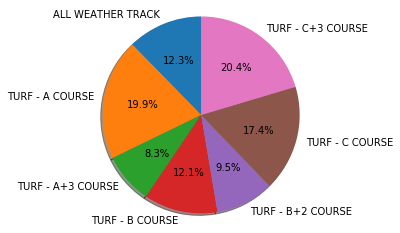

In [13]:
# group by course
g = results.groupby('course')

labels = list(g.groups.keys())
sizes = list(g.size())

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 

plt.show()

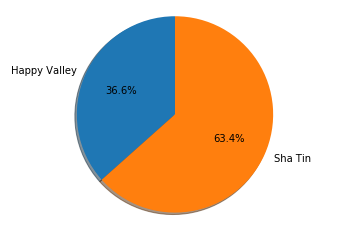

In [14]:
# group by venue
g = results.groupby('venue')

labels = list(g.groups.keys())
sizes = list(g.size())

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 

plt.show()

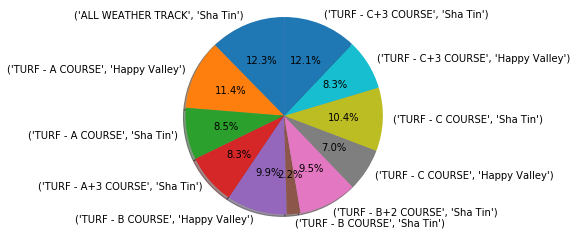

In [15]:
# group by course and venue
g = results.groupby(['course','venue'])

labels = list(g.groups.keys())
sizes = list(g.size())

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 

plt.show()

## Course/Venue - Horse Relationship
Find if a horse performs particularly well on a specific course/venue

In [16]:
# course

# assume getting the first three places as 'good performance'
mask = (results['plc']=='1') | (results['plc']=='2') | (results['plc']=='3')
winners = results[mask]
g = winners.groupby(['horse_code','course']).size()
# check horse that got more than twice 1st/2nd/3rd places
g = g[g>2]
winners_course = pd.DataFrame(g)
winners_course = winners_course.rename(columns={0:'counts'})
winners_course.unstack()

counts                                    \
course     ALL WEATHER TRACK TURF - A COURSE TURF - A+3 COURSE   
horse_code                                                       
A064                     NaN             3.0               NaN   
A066                     NaN             NaN               NaN   
A067                     NaN             NaN               NaN   
K212                     4.0             NaN               NaN   
M199                     NaN             NaN               NaN   
...                      ...             ...               ...   
V181                     3.0             NaN               NaN   
V187                     3.0             NaN               NaN   
V248                     NaN             NaN               NaN   
V326                     NaN             NaN               NaN   
V397                     NaN             NaN               NaN   

                                                                                
course     TURF - B COURSE TURF - B+2 COURSE TURF - C COURSE TURF - C+3 COURSE  
horse_code                                                                      
A064                   NaN               NaN             NaN               NaN  
A066                   NaN               NaN             3.0               NaN  
A067                   NaN               NaN             3.0               NaN  
K212                   NaN               NaN             NaN               NaN  
M199                   NaN               NaN             5.0               NaN  
...                    ...               ...             ...               ...  
V181                   NaN               NaN             NaN               NaN  
V187                   NaN               NaN             NaN               NaN  
V248                   NaN               NaN             NaN               3.0  
V326                   NaN               NaN             NaN               4.0  
V397                   NaN               NaN             3.0               NaN  

[180 rows x 7 columns]

In [17]:
# venue
g = winners.groupby(['horse_code','venue']).size()
g = g[g>2]
winners_venue = pd.DataFrame(g)
winners_venue = winners_venue.rename(columns={0:'counts'})
winners_venue.unstack()

counts        
venue      Happy Valley Sha Tin
horse_code                     
A002                NaN     3.0
A008                NaN     4.0
A009                5.0     NaN
A050                NaN     4.0
A051                3.0     NaN
...                 ...     ...
V388                NaN     3.0
V397                NaN     6.0
V398                NaN     4.0
V410                NaN     4.0
V605                NaN     3.0

[458 rows x 2 columns]

## Jockey/Trainer - Course/Venue Relationship

In [18]:
# jockey - course
jockey_course = pd.DataFrame(winners.groupby(['jockey','course']).size())
jockey_course = jockey_course.rename(columns={0:'count'})
jockey_course.unstack()

count                                    \
course       ALL WEATHER TRACK TURF - A COURSE TURF - A+3 COURSE   
jockey                                                             
A Badel                    1.0             4.0               NaN   
A Sanna                    NaN             NaN               NaN   
A Suborics                 2.0             5.0               3.0   
B Prebble                 15.0            41.0              18.0   
C Brown                    1.0             NaN               NaN   
C K Tong                   1.0             1.0               1.0   
C Murray                   NaN             NaN               NaN   
C Schofield               16.0            24.0              12.0   
C Soumillon                NaN             5.0               2.0   
C Williams                 1.0             5.0               NaN   
C Y Ho                    14.0            27.0               6.0   
D Lane                     NaN             2.0               3.0   
D Oliver                   NaN             1.0               NaN   
D Whyte                   27.0            30.0              18.0   
E da Silva                 1.0             NaN               NaN   
F Geroux                   NaN             NaN               NaN   
G Benoist                  4.0             2.0               1.0   
G Lerena                   NaN             7.0               1.0   
G Mosse                    4.0            21.0               9.0   
G Schofield                2.0             NaN               NaN   
H Bowman                   2.0            11.0               1.0   
H N Wong                  15.0            13.0               2.0   
H T Mo                     6.0             3.0               2.0   
H W Lai                   12.0            11.0               2.0   
J Moreira                 53.0            75.0              43.0   
K C Leung                 12.0            25.0               9.0   
K C Ng                     5.0             9.0               NaN   
K K Chiong                 9.0            20.0               9.0   
K Teetan                  35.0            34.0              16.0   
K Tosaki                   NaN             1.0               NaN   
L Corrales                 NaN             NaN               NaN   
L Salles                   NaN             NaN               NaN   
M Barzalona                NaN             NaN               NaN   
M Chadwick                 6.0            13.0               5.0   
M Demuro                   NaN             NaN               NaN   
M F Poon                   3.0             NaN               2.0   
M Guyon                    NaN             2.0               NaN   
M L Yeung                 16.0            29.0              12.0   
N Callan                  26.0            53.0              16.0   
N Rawiller                22.0            30.0              11.0   
O Bosson                   1.0             5.0               2.0   
O Doleuze                 11.0            10.0               3.0   
O Murphy                   1.0             2.0               NaN   
P Smullen                  NaN             NaN               NaN   
R Fourie                   3.0             4.0               1.0   
R Moore                    3.0            19.0               1.0   
S Clipperton              11.0             3.0               3.0   
S de Sousa                 5.0            19.0               5.0   
T Angland                  NaN             3.0               NaN   
T Berry                    NaN             4.0               NaN   
T H So                    15.0            11.0               5.0   
U Rispoli                  3.0             5.0               NaN   
V Cheminaud                NaN             2.0               1.0   
W M Lai                    NaN             4.0               NaN   
Y T Cheng                 11.0            10.0               2.0   
Y Take                     NaN             1.0               NaN   
Z Purton     

In [19]:
# jockey - venue
jockey_venue = pd.DataFrame(winners.groupby(['jockey','venue']).size())
jockey_venue = jockey_venue.rename(columns={0:'count'})
jockey_venue.unstack()

count        
venue        Happy Valley Sha Tin
jockey                           
A Badel               9.0     7.0
A Sanna               NaN     3.0
A Suborics            8.0    12.0
B Prebble            73.0   113.0
C Brown               NaN     1.0
C K Tong              4.0     5.0
C Murray              NaN     1.0
C Schofield          37.0    90.0
C Soumillon           NaN     8.0
C Williams            4.0     7.0
C Y Ho               60.0    58.0
D Lane                4.0     7.0
D Oliver              NaN     1.0
D Whyte              75.0    97.0
E da Silva            3.0     1.0
F Geroux              1.0     NaN
G Benoist             8.0    11.0
G Lerena             15.0     8.0
G Mosse              27.0    56.0
G Schofield           1.0     3.0
H Bowman              2.0    15.0
H N Wong             28.0    47.0
H T Mo                3.0    30.0
H W Lai              30.0    37.0
J Moreira           170.0   311.0
K C Leung            58.0    74.0
K C Ng               17.0    17.0
K K Chiong           49.0    69.0
K Teetan             80.0   119.0
K Tosaki              2.0     NaN
L Corrales            NaN     1.0
L Salles              NaN     1.0
M Barzalona           3.0     NaN
M Chadwick           28.0    44.0
M Demuro              1.0     NaN
M F Poon              2.0    17.0
M Guyon               1.0     1.0
M L Yeung            55.0    78.0
N Callan             88.0   106.0
N Rawiller           57.0    92.0
O Bosson              5.0     7.0
O Doleuze            34.0    34.0
O Murphy              4.0     5.0
P Smullen             1.0     NaN
R Fourie             10.0    19.0
R Moore              12.0    27.0
S Clipperton         10.0    45.0
S de Sousa           27.0    32.0
T Angland             NaN     3.0
T Berry               NaN    10.0
T H So               27.0    32.0
U Rispoli            14.0    24.0
V Cheminaud          11.0     5.0
W M Lai               4.0     2.0
Y T Cheng            20.0    33.0
Y Take                NaN     1.0
Z Purton            105.0   212.0

In [20]:
# trainer - course
trainer_course = pd.DataFrame(winners.groupby(['trainer','course']).size())
trainer_course = trainer_course.rename(columns={0:'count'})
trainer_course.unstack()

count                                    \
course         ALL WEATHER TRACK TURF - A COURSE TURF - A+3 COURSE   
trainer                                                              
A Fabre                      NaN             1.0               NaN   
A Lee                       12.0            22.0               7.0   
A P O'Brien                  NaN             2.0               NaN   
A S Cruz                     9.0            50.0              18.0   
A Schutz                     3.0             9.0               3.0   
A T Millard                 20.0            27.0              12.0   
C Fownes                    28.0            38.0               9.0   
C H Yip                     15.0            29.0              15.0   
C S Shum                     7.0            34.0              11.0   
C W Chang                   20.0            10.0               8.0   
D Cruz                       4.0            18.0               2.0   
D E Ferraris                13.0            31.0               8.0   
D J Hall                    14.0            33.0              15.0   
H Fujiwara                   NaN             1.0               NaN   
J Lau                        NaN             NaN               NaN   
J Moore                     35.0            45.0              20.0   
J Size                      51.0            51.0              21.0   
K L Man                     10.0            29.0              10.0   
K W Lui                      9.0            32.0              14.0   
L Ho                        17.0            15.0               6.0   
M Hawkes                     NaN             NaN               NaN   
M Saito                      NaN             1.0               NaN   
M Sakaguchi                  NaN             1.0               NaN   
N Hori                       NaN             3.0               NaN   
P F Yiu                     14.0            38.0              11.0   
P O'Sullivan                25.0            30.0              17.0   
R Gibson                    15.0            18.0              10.0   
S Woods                      7.0             9.0               3.0   
T K Ng                       7.0            11.0               NaN   
T P Yung                    22.0            28.0              12.0   
W Y So                      17.0            22.0              14.0   
Y S Tsui                    34.0            27.0              13.0   
de Royer Dupre               NaN             2.0               NaN   

                                                                  \
course         TURF - B COURSE TURF - B+2 COURSE TURF - C COURSE   
trainer                                                            
A Fabre                    NaN               NaN             NaN   
A Lee                     20.0              14.0            16.0   
A P O'Brien                NaN               NaN             NaN   
A S Cruz                  19.0              31.0            42.0   
A Schutz                   8.0               2.0             6.0   
A T Millard               30.0               6.0            28.0   
C Fownes                  23.0              14.0            33.0   
C H Yip                   14.0              18.0            27.0   
C S Shum                  28.0              12.0            35.0   
C W Chang                  5.0               6.0            15.0   
D Cruz                    13.0               7.0            20.0   
D E Ferraris              23.0               9.0            21.0   
D J Hall                  15.0              12.0            27.0   
H Fujiwara                 NaN               NaN             NaN   
J Lau                      NaN               NaN             1.0   
J Moore                   10.0              34.0            34.0   
J Size                    25.0              25.0            50.0   
K L Man                   16.0              12.0            20.0   
K W Lui                   15.0              10.0            20.0   
L Ho      

In [21]:
# trainer - venue
trainer_venue = pd.DataFrame(winners.groupby(['trainer','venue']).size())
trainer_venue = trainer_venue.rename(columns={0:'count'})
trainer_venue.unstack()

count        
venue          Happy Valley Sha Tin
trainer                            
A Fabre                 NaN     1.0
A Lee                  53.0    55.0
A P O'Brien             NaN     2.0
A S Cruz               67.0   148.0
A Schutz               18.0    23.0
A T Millard            76.0    79.0
C Fownes              102.0    85.0
C H Yip                52.0   107.0
C S Shum               89.0    82.0
C W Chang              18.0    62.0
D Cruz                 51.0    34.0
D E Ferraris           78.0    53.0
D J Hall               49.0    89.0
H Fujiwara              NaN     1.0
J Lau                   NaN     1.0
J Moore                24.0   200.0
J Size                 84.0   197.0
K L Man                52.0    75.0
K W Lui                53.0    69.0
L Ho                   47.0    54.0
M Hawkes                NaN     1.0
M Saito                 NaN     1.0
M Sakaguchi             NaN     1.0
N Hori                  NaN     4.0
P F Yiu                79.0    94.0
P O'Sullivan           70.0   113.0
R Gibson               38.0    61.0
S Woods                18.0    19.0
T K Ng                 31.0    12.0
T P Yung               26.0   110.0
W Y So                 49.0    86.0
Y S Tsui               63.0   118.0
de Royer Dupre          NaN     2.0

## Horse vs. Rating and how it influene the outcome of the game

In [130]:
horse_info = pd.read_csv('horse_info.csv', index_col = 0)
horse_info['horse_code'] = horse_info['horse'].apply(lambda x: extract_horse_code(pattern, x))
horse_ratings = results.merge(horse_info.loc[:,['horse_code','current_rating','start_rating']],on='horse_code')

In [131]:
horse_ratings = horse_ratings.dropna(subset = ['current_rating'])
horse_ratings

,row,plc,horseno,horse,jockey,trainer,actualwt,declarwt,draw,lbw,runningpos,finishtime,winodds,date,raceno,class,distance,going,handicap,course,stake,venue,horse_code,current_rating,start_rating
7,0,1,7.0,SOLAR HEI HEI(T242),B Prebble,D J Hall,125.0,1077.0,11.0,-,9 8 1,1.09.06,2.3,2015-06-07,1,4,1200,GOOD TO FIRM,HKU FOUNDATION HANDICAP,TURF - A+3 COURSE,760000,Sha Tin,T242,93.0,90.0
8,0,1,10.0,SOLAR HEI HEI(T242),B Prebble,D J Hall,121.0,1089.0,7.0,-,6 4 1,1.09.71,2.1,2015-10-25,4,3,1200,GOOD TO FIRM,FRANCK MULLER EXCELLENT HANDICAP,TURF - A COURSE,1165000,Sha Tin,T242,93.0,90.0
9,0,1,4.0,SOLAR HEI HEI(T242),B Prebble,D J Hall,123.0,1085.0,14.0,-,13 10 1,1.09.68,4.6,2016-01-01,7,3,1200,GOOD,TAI MO SHAN HANDICAP,TURF - B+2 COURSE,1165000,Sha Tin,T242,93.0,90.0
10,0,1,5.0,SOLAR HEI HEI(T242),B Prebble,D J Hall,130.0,1078.0,6.0,-,3 3 1,1.09.43,1.8,2015-07-01,9,4,1200,GOOD TO FIRM,THE GUANGDONG-HONG KONG CUP (HANDICAP),TURF - A COURSE,760000,Sha Tin,T242,93.0,90.0
11,0,1,3.0,SOLAR HEI HEI(T242),B Prebble,D J Hall,130.0,1083.0,2.0,-,6 6 4 1,1.37.49,14.0,2016-04-24,9,3,1600,YIELDING,AUDEMARS PIGUET ROYAL OAK CONCEPT HANDICAP,TURF - A COURSE,1165000,Sha Tin,T242,93.0,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13797,13,14,8.0,PENZANCE(A272),J Moreira,D J Hall,127.0,1150.0,7.0,22,7 7 14 14,1.26.08,8.9,2017-06-18,3,4,1400,GOOD TO YIELDING,LEVADE HANDICAP,TURF - C+3 COURSE,840000,Sha Tin,A272,45.0,50.0
13799,13,14,1.0,DALRADIAN(A213),K C Leung,D Cruz,131.0,1191.0,3.0,16,5 4 14,0.58.05,7.8,2017-04-09,5,3,1000,GOOD TO FIRM,THE BEIJING CLUBHOUSE ANNIVERSARY CUP (HANDICAP),TURF - C COURSE,1235000,Sha Tin,A213,74.0,81.0
13807,13,14,9.0,MEGA TREASURE(A237),D Whyte,A Lee,119.0,1029.0,5.0,14-1/2,13 14 14,0.59.05,99.0,2017-05-13,7,3,1000,GOOD,THE LI CUP (HANDICAP),TURF - C COURSE,1235000,Sha Tin,A237,48.0,66.0
13811,13,14,13.0,ALCAZAR(A131),C Y Ho,K L Man,115.0,1072.0,11.0,21-3/4,11 11 13 14,1.24.88,99.0,2017-07-09,10,3,1400,GOOD,LEI YUE MUN PARK HANDICAP,TURF - B+2 COURSE,1235000,Sha Tin,A131,60.0,62.0


In [132]:
# HOWEVER we realize the ratings are quite off from class
# i.e. a class 1 horse has rating much lower than 85
# we thus decided not to use ratings in our analysis
horse_ratings[(horse_ratings['date']=='2015-06-14')&(horse_ratings['raceno']==1)]

,row,plc,horseno,horse,jockey,trainer,actualwt,declarwt,draw,lbw,runningpos,finishtime,winodds,date,raceno,class,distance,going,handicap,course,stake,venue,horse_code,current_rating,start_rating
25,0,1,11.0,PEOPLE'S KNIGHT(T305),G Mosse,J Moore,120.0,1149.0,4.0,-,4 4 1,1.09.70,6.6,2015-06-14,1,1,1200,GOOD TO FIRM,BREGUET PLATE,TURF - B+2 COURSE,800000,Sha Tin,T305,85.0,91.0
2310,1,2,7.0,CIRCUIT KING(T324),J Moreira,A S Cruz,120.0,1074.0,12.0,3/4,2 2 2,1.09.82,3.4,2015-06-14,1,1,1200,GOOD TO FIRM,BREGUET PLATE,TURF - B+2 COURSE,800000,Sha Tin,T324,67.0,69.0
7897,10,11,3.0,JIMSON THE FAMOUS(T253),H N Wong,C H Yip,119.0,1033.0,7.0,13-3/4,9 11 11,1.11.90,96.0,2015-06-14,1,1,1200,GOOD TO FIRM,BREGUET PLATE,TURF - B+2 COURSE,800000,Sha Tin,T253,31.0,38.0
8045,9,10,10.0,LE PEGASE(T280),D Lane,A T Millard,120.0,1009.0,6.0,11-3/4,7 9 10,1.11.57,99.0,2015-06-14,1,1,1200,GOOD TO FIRM,BREGUET PLATE,TURF - B+2 COURSE,800000,Sha Tin,T280,25.0,19.0
10088,4,5,9.0,FINE WITH ME(T178),M L Yeung,K W Lui,118.0,1064.0,1.0,3,8 7 5,1.10.17,17.0,2015-06-14,1,1,1200,GOOD TO FIRM,BREGUET PLATE,TURF - B+2 COURSE,800000,Sha Tin,T178,39.0,47.0


In [112]:
# class - place relationship

g = results.groupby(['class','plc'])
class_plc = g.size().unstack()
class_plc

plc,1,10,11,12,13,14,2,3,4,5,6,7,8,9
class,,,,,,,,,,,,,,
1,71,43,39,28,18,16,69,70,70,72,66,61,55,50
2,116,108,103,93,48,38,116,116,116,116,117,116,115,115
3,366,359,351,335,153,132,365,365,368,363,364,365,364,364
4,404,401,394,364,165,142,402,406,406,398,404,401,404,402
5,161,158,157,141,64,55,160,159,160,161,160,159,162,158


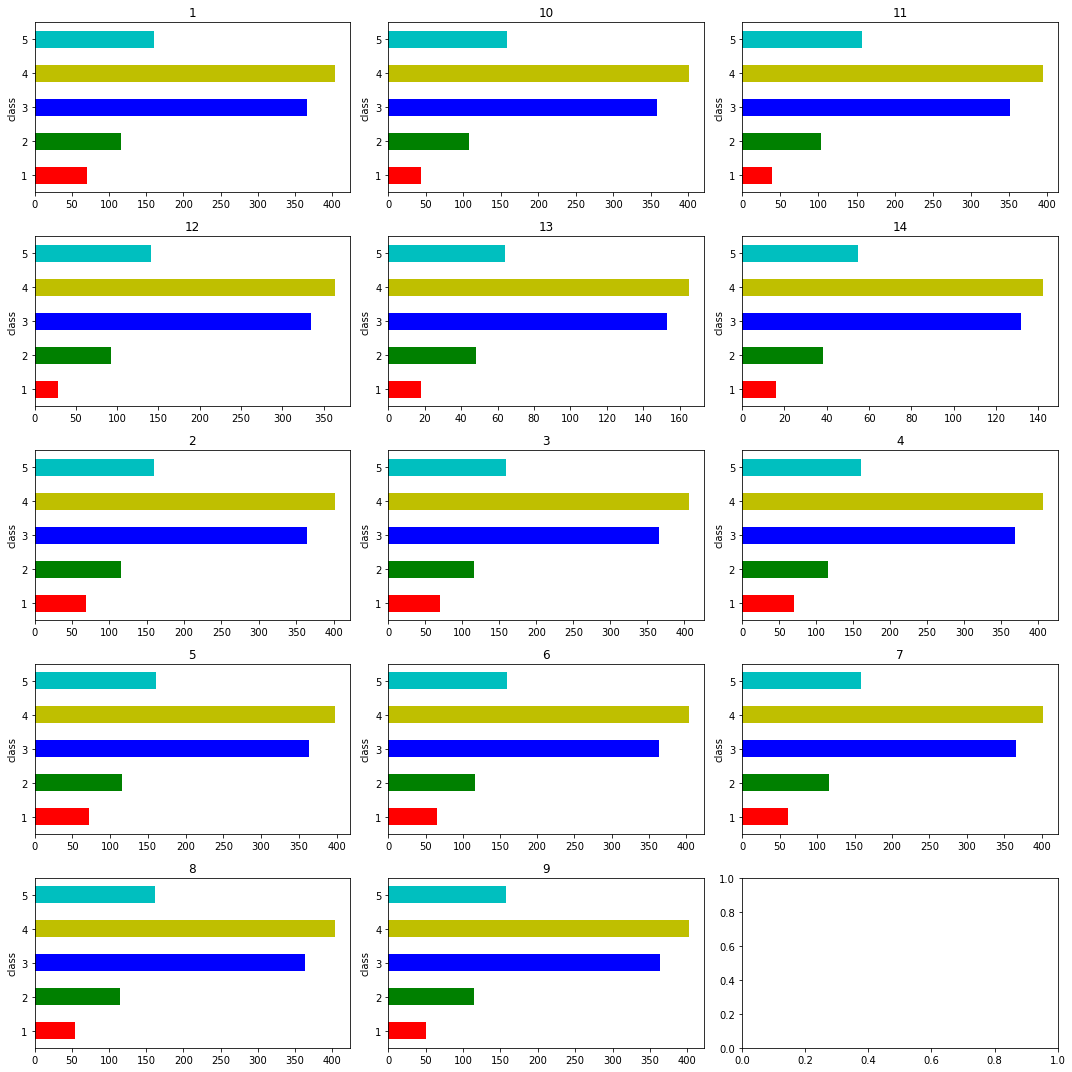

In [115]:
%matplotlib inline
COL_NUM = 3
ROW_NUM = 5

fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(15,15))

colors = ['r','g','b','y','c']
for i, (class_, plc) in enumerate(class_plc.items()): 
    ax = axes[int(i/COL_NUM), i%COL_NUM]
    plc.plot(kind='barh', ax=ax, color=colors)
    ax.set_title(class_)

plt.tight_layout() 

## Class vs. Horse Profile

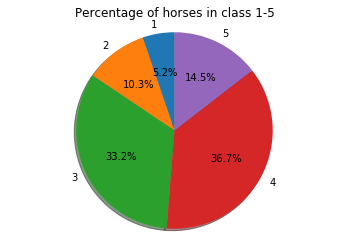

In [48]:
g = results.groupby('class')

labels = list(g.groups.keys())
sizes = list(g.size())

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
ax1.set_title('Percentage of horses in class 1-5')
plt.show()

## Extracting horse code from the horse name

## Import horse info file

In [23]:
horse_info = pd.read_csv('horse_info.csv', index_col = 0)

horse_info.head()

,horse,country,trainer,colour,sex,owner,import_type,current_rating,start_rating,sire,dam,age
0,()(S259),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,(C368),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A BEAUTIFUL(T421),AUS,W Y So,Bay,Gelding,Sandia Yit Lau Ying Lam & Yit Kwok Leung,PP,64.0,58.0,Bushranger,Anfield,6.0
3,A FAST ONE(S424),AUS,D E Ferraris,Bay,Gelding,Samson Yip Yan Tion & David Vrijmoed,PPG,37.0,40.0,Holy Roman Emperor,Detail,6.0
4,A SHIN HIKARI(V614),JPN,NaN,Grey,Horse,Eishindo Co Ltd,VIS,NaN,NaN,Deep Impact,Catalina,NaN


## Extracting horse code from the horse name

In [25]:
horse_info['horse_code'] = horse_info['horse'].apply(lambda x: extract_horse_code(pattern, x))
horse_info.head()

,horse,country,trainer,colour,sex,owner,import_type,current_rating,start_rating,sire,dam,age,horse_code
0,()(S259),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S259
1,(C368),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C368
2,A BEAUTIFUL(T421),AUS,W Y So,Bay,Gelding,Sandia Yit Lau Ying Lam & Yit Kwok Leung,PP,64.0,58.0,Bushranger,Anfield,6.0,T421
3,A FAST ONE(S424),AUS,D E Ferraris,Bay,Gelding,Samson Yip Yan Tion & David Vrijmoed,PPG,37.0,40.0,Holy Roman Emperor,Detail,6.0,S424
4,A SHIN HIKARI(V614),JPN,NaN,Grey,Horse,Eishindo Co Ltd,VIS,NaN,NaN,Deep Impact,Catalina,NaN,V614


In [14]:
len(set(horse_info['horse_code']).intersection(set(results['horse_code'])))

1790

In [15]:
len(set(horse_info['horse_code']))

3935

In [16]:
len(set(results['horse_code']))

1807

## Merge result and horse info together using horse code

In [17]:
result_merged = pd.merge(results, horse_info, left_on = 'horse_code', right_on = 'horse_code', suffixes=('', '_2'))

result_merged.head()

,row,plc,horseno,horse,jockey,trainer,actualwt,declarwt,draw,lbw,runningpos,finishtime,winodds,date,raceno,class,distance,going,handicap,course,stake,venue,horse_code,horse_2,country,trainer_2,colour,sex,owner,import_type,current_rating,start_rating,sire,dam,age
0,0,1,10.0,NATURAL EIGHT(S243),C Y Ho,C Fownes,119.0,1037.0,1.0,-,4 3 1,1.10.19,3.5,2015-06-03,1,5,1200,GOOD TO FIRM,MOUNT BUTLER HANDICAP,TURF - A COURSE,575000,Happy Valley,S243,NATURAL EIGHT(S243),NZ,NaN,Bay,Gelding,Lionel Chan Man Yan,PPG,NaN,NaN,Testa Rossa,Wolfmother,NaN
1,5,6,5.0,NATURAL EIGHT(S243),C Y Ho,C Fownes,124.0,1059.0,4.0,1-3/4,3 4 6,1.11.29,4.8,2015-09-16,1,5,1200,GOOD,CHEUNG HONG HANDICAP,TURF - B COURSE,600000,Happy Valley,S243,NATURAL EIGHT(S243),NZ,NaN,Bay,Gelding,Lionel Chan Man Yan,PPG,NaN,NaN,Testa Rossa,Wolfmother,NaN
2,5,6,5.0,NATURAL EIGHT(S243),Z Purton,C Fownes,127.0,1036.0,7.0,7,6 5 6,1.10.90,10.0,2015-07-08,2,5,1200,GOOD TO FIRM,THE KING HANDICAP,TURF - A COURSE,575000,Happy Valley,S243,NATURAL EIGHT(S243),NZ,NaN,Bay,Gelding,Lionel Chan Man Yan,PPG,NaN,NaN,Testa Rossa,Wolfmother,NaN
3,8,9,4.0,NATURAL EIGHT(S243),C Y Ho,C Fownes,131.0,1053.0,4.0,5-1/2,7 8 9,1.11.39,10.0,2015-11-14,1,5,1200,GOOD,PANASONIC DRIVING VIDEO RECORDER HANDICAP,TURF - A+3 COURSE,600000,Sha Tin,S243,NATURAL EIGHT(S243),NZ,NaN,Bay,Gelding,Lionel Chan Man Yan,PPG,NaN,NaN,Testa Rossa,Wolfmother,NaN
4,8,9,3.0,NATURAL EIGHT(S243),C Y Ho,C Fownes,129.0,1045.0,1.0,4-1/4,3 4 9,1.11.27,7.1,2016-01-06,1,5,1200,GOOD,PATERSON HANDICAP,TURF - A COURSE,600000,Happy Valley,S243,NATURAL EIGHT(S243),NZ,NaN,Bay,Gelding,Lionel Chan Man Yan,PPG,NaN,NaN,Testa Rossa,Wolfmother,NaN


## Import trackwork file

In [18]:
trackwork = pd.read_csv('trackwork.csv', index_col = 0)

trackwork.head(10)

,horse,horse_code,date,type,track,workouts,gear
0,A BEAUTIFUL,T421,2015-07-20,Trotting,Sha TinTroR,TroR Canter (R.B.),NaN
1,A BEAUTIFUL,T421,2015-07-21,Trotting,Sha TinTroR,TroR Canter (R.B.),NaN
2,A BEAUTIFUL,T421,2015-07-22,Trotting,Sha TinTroR,TroR Canter (R.B.),NaN
3,A BEAUTIFUL,T421,2015-07-23,Trotting,Sha TinTroR,TroR Canter (R.B.),NaN
4,A BEAUTIFUL,T421,2015-07-24,Trotting,Sha TinTroR,TroR Canter (R.B.),NaN
5,A BEAUTIFUL,T421,2015-07-25,Trotting,Sha TinTroR,TroR Canter (R.B.),NaN
6,A BEAUTIFUL,T421,2015-07-26,Trotting,Sha TinTroR,TroR Canter (R.B.),NaN
7,A BEAUTIFUL,T421,2015-07-27,Trotting,Sha TinSmT,SmT 1 Round - Fast (R.B.),NaN
8,A BEAUTIFUL,T421,2015-07-28,Trotting,Sha TinSmT,SmT 1 Round - Fast (R.B.),NaN
9,A BEAUTIFUL,T421,2015-07-29,Trotting,Sha TinSmT,SmT 1 Round - Fast (R.B.),NaN


In [19]:
trackwork[trackwork['horse_code'] == 'T421'].head(20)

# results[(results['horse_code'] == 'T421')].head(20)

,horse,horse_code,date,type,track,workouts,gear
0,A BEAUTIFUL,T421,2015-07-20,Trotting,Sha TinTroR,TroR Canter (R.B.),NaN
1,A BEAUTIFUL,T421,2015-07-21,Trotting,Sha TinTroR,TroR Canter (R.B.),NaN
2,A BEAUTIFUL,T421,2015-07-22,Trotting,Sha TinTroR,TroR Canter (R.B.),NaN
3,A BEAUTIFUL,T421,2015-07-23,Trotting,Sha TinTroR,TroR Canter (R.B.),NaN
4,A BEAUTIFUL,T421,2015-07-24,Trotting,Sha TinTroR,TroR Canter (R.B.),NaN
5,A BEAUTIFUL,T421,2015-07-25,Trotting,Sha TinTroR,TroR Canter (R.B.),NaN
6,A BEAUTIFUL,T421,2015-07-26,Trotting,Sha TinTroR,TroR Canter (R.B.),NaN
7,A BEAUTIFUL,T421,2015-07-27,Trotting,Sha TinSmT,SmT 1 Round - Fast (R.B.),NaN
8,A BEAUTIFUL,T421,2015-07-28,Trotting,Sha TinSmT,SmT 1 Round - Fast (R.B.),NaN
9,A BEAUTIFUL,T421,2015-07-29,Trotting,Sha TinSmT,SmT 1 Round - Fast (R.B.),NaN


## Import barrier file

In [20]:
barrier = pd.read_csv('barrier.csv', index_col = 0)

barrier = barrier[['plc', 'horse', 'jockey', 'trainer', 'draw', 'gear', 'lbw',
       'runningpos', 'time', 'comment', 'date', 'distance', 'going', 'raceno',
       'venue', 'course', 'result']]

barrier.head()

,plc,horse,jockey,trainer,draw,gear,lbw,runningpos,time,comment,date,distance,going,raceno,venue,course,result
0,5,A BEAUTIFUL(T421),B Prebble,W Y So,1.0,NaN,4-3/4L,7 7 5,0.57.93,Ran on ok when asked late.,2015-09-22,1000,GOOD,1,SHA TIN,TURF,Passed
1,3,A BEAUTIFUL(T421),B Prebble,W Y So,6.0,NaN,5-3/4L,5 5 3,1.02.95,Slow to begin; made progress by saving ground ...,2015-10-09,200,GOOD,12,SHA TIN,TURF,Passed
2,10,A BEAUTIFUL(T421),B Prebble,W Y So,10.0,NaN,3-1/4L,8 8 10,1.02.26,Ran on ordinary when asked at 200m.,2015-09-08,200,GOOD,4,SHA TIN,ALL WEATHER TRACK,Failed
3,9,A BEAUTIFUL(T421),H N Wong,W Y So,1.0,H,10-3/4L,5 4 9,1.11.72,Raced along the rail; flattened late.,2015-12-15,1200,GOOD,2,SHA TIN,ALL WEATHER TRACK,NaN
4,3,A BEAUTIFUL(T421),H W Lai,W Y So,4.0,B,2-1/4L,7 4 3,1.02.28,Wide at turn; came home strong for 3rd.,2016-06-03,1050,GOOD,3,SHA TIN,ALL WEATHER TRACK,Passed


In [21]:
barrier.groupby(['date','venue','course','raceno']).size().reset_index()

,date,venue,course,raceno,0
0,2015-06-02,SHA TIN,TURF,1,9
1,2015-06-02,SHA TIN,TURF,2,6
2,2015-06-02,SHA TIN,TURF,3,7
3,2015-06-02,SHA TIN,TURF,4,8
4,2015-06-05,SHA TIN,ALL WEATHER TRACK,1,10
...,...,...,...,...,...
1019,2017-07-07,SHA TIN,ALL WEATHER TRACK,1,7
1020,2017-07-07,SHA TIN,ALL WEATHER TRACK,2,8
1021,2017-07-07,SHA TIN,ALL WEATHER TRACK,3,6
1022,2017-07-11,SHA TIN,ALL WEATHER TRACK,1,9


In [22]:
barrier[(barrier['raceno'] == 1) & (barrier['course'] == 'TURF') & (barrier['date'] == '2015-06-02')]

,plc,horse,jockey,trainer,draw,gear,lbw,runningpos,time,comment,date,distance,going,raceno,venue,course,result
27,2,ABLE FRIEND(P303),J Moreira,J Moore,9.0,CP,SH,8 8 8 2,1.37.74,Taken back early; ran on well without being as...,2015-06-02,1600,GOOD,1,SHA TIN,TURF,NaN
4859,4,LET ME GO(P215),K Teetan,J Moore,8.0,H,1-3/4L,7 7 7 4,1.38.02,Rearward early; responded ok when asked in str...,2015-06-02,1600,GOOD,1,SHA TIN,TURF,NaN
5140,8,LUCKY PLACE(T004),N Rawiller,W Y So,4.0,H,10L,3 3 3 8,1.39.35,On-pace early; weakened in straight.,2015-06-02,1600,GOOD,1,SHA TIN,TURF,NaN
5678,7,MR GINGER(N307),Z Purton,C Fownes,2.0,NaN,7-1/2L,2 2 2 7,1.38.92,In touch early; had a hold in straight.,2015-06-02,1600,GOOD,1,SHA TIN,TURF,NaN
6161,1,PACKING LLAREGYB(S109),M L Yeung,A Schutz,7.0,H/SR,NaN,5 5 5 1,1.37.73,Midfield early; quickened well when cleared in...,2015-06-02,1600,GOOD,1,SHA TIN,TURF,NaN
6520,9,PRINCE FALCON(T144),C W Wong,J Moore,3.0,NaN,NaN,Withdrawn,NaN,NaN,2015-06-02,1600,GOOD,1,SHA TIN,TURF,NaN
6959,3,ROMANTIC TOUCH(S393),B Prebble,T P Yung,6.0,NaN,Head,6 6 6 3,1.37.76,Eased early; dashed well for place.,2015-06-02,1600,GOOD,1,SHA TIN,TURF,NaN
7871,5,SUNNY YING(P152),K C Leung,J Moore,1.0,B,3-1/4L,1 1 1 5,1.38.27,Led early; flattened late.,2015-06-02,1600,GOOD,1,SHA TIN,TURF,Passed
8102,6,SYSTEM OVERLOAD(T115),D Lane,D J Hall,5.0,NaN,3-1/2L,4 4 4 6,1.38.28,Raced midfield under a hold; ran on ok.,2015-06-02,1600,GOOD,1,SHA TIN,TURF,NaN


In [23]:
barrier[(barrier['raceno'] == 1) & (barrier['horse'] == 'YOUNG RANGER(S435)')]

,plc,horse,jockey,trainer,draw,gear,lbw,runningpos,time,comment,date,distance,going,raceno,venue,course,result
9186,1,YOUNG RANGER(S435),A Badel,C S Shum,7.0,B,NaN,4 1 1 1,1.49.84,Hit the front at 1000m; kept on in the Straigh...,2017-01-21,1700,GOOD,1,HAPPY VALLEY,TURF,NaN
9189,3,YOUNG RANGER(S435),K C Leung,C S Shum,2.0,B,3-1/4L,4 3 3,1.10.91,Up with the pace; not fully tested.,2016-02-05,1200,GOOD,1,SHA TIN,ALL WEATHER TRACK,NaN
9191,7,YOUNG RANGER(S435),K K Chiong,C S Shum,4.0,B,5-3/4L,2 4 7,1.10.83,On-pace early; found nothing when asked.,2016-05-13,1200,GOOD,1,SHA TIN,ALL WEATHER TRACK,Passed
9194,1,YOUNG RANGER(S435),N Rawiller,C S Shum,7.0,B,NaN,1 1 1 1,1.51.54,Led early; kept on well to score.,2017-03-04,1700,GOOD,1,HAPPY VALLEY,TURF,NaN


## Import comment file

In [24]:
comments = pd.read_csv('comments.csv', index_col = 0)

comments = comments[['date','raceno','plc','horseno','gear','comment']]

comments.head(11)

,date,raceno,plc,horseno,gear,comment
0,2015-06-03,1,11,1,B/H,"Ridden along from the middle gate, gained a sp..."
1,2015-06-03,1,4,2,SR/TT,"Settled at the back from the widest gate, save..."
2,2015-06-03,1,7,3,B2/TT,"Settled in last few from a poor draw, widest r..."
3,2015-06-03,1,6,5,--,"Broke well, gradually taken back just off the ..."
4,2015-06-03,1,3,6,--,"Broke well before settling in midfield, switch..."
5,2015-06-03,1,5,7,B/SR,"Settled in rear of midfield on rails, clipped ..."
6,2015-06-03,1,8,8,CP/H/TT,"Began fairly, settled 3-wide in rear of midfie..."
7,2015-06-03,1,9,9,B,Travelled in a prominent position 3-wide witho...
8,2015-06-03,1,1,10,B/H,"Settled just off the pace on rails, soon came ..."
9,2015-06-03,1,10,11,PC/TT,Never seen with a chance. ...


## Perform VaderSentiment Analysis to get score on comment

In [27]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 

def sentiment_scores(sentence): 
  
    sid_obj = SentimentIntensityAnalyzer() 
    sentiment_dict = sid_obj.polarity_scores(sentence) 
    
#     print("Overall sentiment dictionary is : ", sentiment_dict) 
#     print("sentence was rated as ", sentiment_dict['neg']*100, "% Negative") 
#     print("sentence was rated as ", sentiment_dict['neu']*100, "% Neutral") 
#     print("sentence was rated as ", sentiment_dict['pos']*100, "% Positive") 
  
#     print("Sentence Overall Rated As", end = " ") 
  
#     if sentiment_dict['compound'] >= 0.05 : 
#         print("Positive") 
  
#     elif sentiment_dict['compound'] <= - 0.05 : 
#         print("Negative") 
  
#     else : 
#         print("Neutral") 
        
    return sentiment_dict['compound']

In [28]:
comments['comment_score'] = comments['comment'].apply(lambda x: sentiment_scores(x))
comments.head()

KeyboardInterrupt: 